### Loading useful packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import constants
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

from SettingPLOTs import *

### SiO2 - Silica

In [5]:
# Frequency and l data
#=====================
fname1_freq = '/home/marvyn/GDrive/m144595@dac.unicamp.br/LPD Team/Papers/Conferences/SBFoton 2019/Tailoring the group-velocity dispersion in silica microspheres through alumina coating/sio2-freq-l.csv'
df1_freq = pd.read_csv(fname1_freq, index_col=False, skiprows=4)
df1_freq.columns = ['l', 'lambda', 'freq', 'l1']
df1_freq.drop(['lambda', 'l1'], axis=1, inplace=True)

# Intensity profiles for differents l's
#======================================
fname1 = '/home/marvyn/GDrive/m144595@dac.unicamp.br/LPD Team/Papers/Conferences/SBFoton 2019/Tailoring the group-velocity dispersion in silica microspheres through alumina coating/mode_dispersion_with_sio2.csv'
df1 = pd.read_csv(fname1, skiprows=0)
headers1 = [str() for c in 'c' * np.shape(df1)[1]]
for ii in range(np.shape(df1)[1]):
    headers1[ii] = 'l{:.0f}'.format(ii)
headers1[0] = 'r (um)'
df1.columns = headers1

df1.head()

,r (um),l1,l2,l3,l4,l5,l6,l7,l8,l9,...,l18,l19,l20,l21,l22,l23,l24,l25,l26,l27
0,105.200069,-8.545949e-08,-5.495295e-08,-2.466160e-08,-1.018380e-08,6.587883e-09,-2.617611e-09,-1.868189e-10,-2.093299e-11,-1.912689e-12,...,-9.446495e-17,2.496962e-17,-1.937237e-17,-7.378670e-17,1.905921e-16,-5.308293e-17,3.598413e-17,7.857405e-17,1.802083e-17,-1.334321e-16
1,105.400137,-2.210549e-07,-1.193985e-07,-4.892826e-08,-1.927642e-08,1.223860e-08,-4.778503e-09,-3.315520e-10,-3.676373e-11,-3.333758e-12,...,-1.623647e-16,-1.049123e-16,1.191011e-17,-1.571617e-16,1.002101e-16,-7.399870e-17,1.002838e-16,1.326020e-16,-8.767062e-17,-1.313263e-16
2,105.600206,-3.487697e-07,-1.700311e-07,-6.512050e-08,-2.463728e-08,1.536982e-08,-5.897384e-09,-3.963370e-10,-4.328686e-11,-3.870982e-12,...,3.449476e-17,-2.654676e-17,3.656137e-17,5.481078e-17,-7.421052e-17,3.716368e-17,-2.495498e-17,2.474756e-17,-1.699403e-17,1.019703e-16
3,105.800274,-3.535119e-07,-1.674626e-07,-6.261392e-08,-2.327034e-08,1.438487e-08,-5.461792e-09,-3.570522e-10,-3.812793e-11,-3.312883e-12,...,1.165256e-16,5.591010e-18,2.206365e-17,1.452797e-16,-1.945680e-16,6.858591e-17,-4.569587e-17,-4.587944e-17,2.487010e-17,2.113138e-16
4,106.000343,-2.049855e-07,-1.016613e-07,-3.897330e-08,-1.461157e-08,9.033787e-09,-3.414927e-09,-2.141655e-10,-2.145663e-11,-1.675768e-12,...,8.344332e-17,-1.232190e-16,5.993880e-17,6.038538e-17,-1.857144e-16,7.346627e-17,-1.541988e-16,-1.580090e-17,5.204583e-17,2.900115e-16


In [6]:
r1_peaks = []
for ii in headers1[1:]:
    df1[ii] = df1[ii]/df1[ii].max()
    r1_peaks.append(df1['r (um)'][df1[ii].idxmax()])

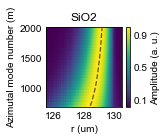

In [19]:
matrix1 = df1.iloc[:,1:].values
r1 = df1['r (um)']
l1 = df1_freq['l']
ν1 = 1e-12*df1_freq['freq'] # in THz

plt.figure(figsize=cm2inch(6,5))

# c = plt.pcolormesh(r1, ν1, np.transpose(matrix1), cmap='plasma', vmin=matrix1.min(), vmax=matrix1.max(), rasterized=True)
c = plt.pcolormesh(r1, l1, np.transpose(matrix1), cmap='viridis', vmin=matrix1.min(), vmax=matrix1.max(), rasterized=True, shading='auto')
plt.colorbar(c, ticks=[0.1, 0.5, 0.9], aspect=25, label='Amplitude (a. u.)')

plt.plot(r1_peaks, l1, 'k--', lw=1.3, alpha=0.6)

plt.xlim(125.5, 130.5)
plt.xticks([126, 128, 130])
plt.xlabel('r (um)')
# plt.ylabel('Frequency (THz)')
plt.ylabel('Azimutal mode number (m)')
plt.title('SiO2')
# plt.grid(True, ls='--', lw=1, alpha=0.5, zorder=1, which ='both')
plt.tight_layout()

# plt.savefig('Figures/'+fname1.split(sep='/')[-1].split(sep='.')[0]+'_ColorMap.svg', dpi=192)

plt.show()

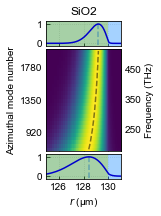

In [29]:
f, (a0, a1, a2) = plt.subplots(3, 1, figsize=cm2inch(3.4,7.4), sharex=True, gridspec_kw={'height_ratios': [1, 4, 1]})
plt.subplots_adjust(hspace=0.05)

xi, xf, R = 125, 131, 130

a0.set_title('SiO2')
a0.plot(df1[df1.columns[0]], df1[df1.columns[-1]], c='mediumblue')
a0.vlines(r1_peaks[-1], ymin=-0.1, ymax=1.1, ls='--', alpha=0.5)
a0.axvspan(xi, 130, color='#228B22', alpha=0.4, lw=0)
a0.axvspan(130, xf, color='#1E90FF', alpha=0.4, lw=0)

a1.pcolormesh(r1, l1, np.transpose(matrix1), cmap='viridis', vmin=matrix1.min(), vmax=matrix1.max(), rasterized=True, shading='auto')
a1.plot(r1_peaks, l1, 'k--',  alpha=0.5)

mid = round((l1.iloc[0]+l1.iloc[-1])/2, 0)
inf = round(mid-2*(l1.iloc[-1]-mid)/3, -1)
sup = round(mid+2*(l1.iloc[-1]-mid)/3, -1)

a1.set_yticks([mid, inf, sup])
a1.set_ylabel('Azimuthal mode number')

z = np.polyfit(l1, ν1, 1)
    
def l2ν(x):
    y = z[0]*x + z[1]
    return y

def ν2l(x):
    y = (x - z[1])/z[0]
    return y

a1v = a1.secondary_yaxis('right', functions=(l2ν, ν2l))
a1v.set_ylabel('Frequency (THz)')
a1v.set_ticks([250, 350, 450])

a2.plot(df1[df1.columns[0]], df1[df1.columns[1]], c='mediumblue')
a2.vlines(r1_peaks[0], ymin=-0.1, ymax=1.1, ls='--', alpha=0.5)
a2.axvspan(xi, R, color='#228B22', alpha=0.4, lw=0)
a2.axvspan(R, xf, color='#1E90FF', alpha=0.4, lw=0)

# f.colorbar(c,  ax=a1, ticks=[0.1,0.5,0.9], label='Amplitude (a.u.)', aspect=24)

plt.xlabel(r'$r$ (μm)')
plt.xlim(xi, xf)
plt.xticks([126, 128, 130])
# plt.tight_layout()

plt.savefig('Figures/'+fname1.split(sep='/')[-1].split(sep='.')[0]+'_ColorMap.svg', dpi=192)

plt.show()

### Al2O3 - Alumina

In [9]:
# Frequency and l data
#=====================
fname2_freq = '/home/marvyn/GDrive/m144595@dac.unicamp.br/LPD Team/Papers/Conferences/SBFoton 2019/Tailoring the group-velocity dispersion in silica microspheres through alumina coating/al2o3-freq-l.csv'
df2_freq = pd.read_csv(fname2_freq, index_col=False, skiprows=4)
df2_freq.columns = ['l', 'lambda', 'freq', 'l1']
df2_freq.drop(['lambda', 'l1'], axis=1, inplace=True)

# Intensity profiles for differents l's
#======================================
fname2 = '/home/marvyn/GDrive/m144595@dac.unicamp.br/LPD Team/Papers/Conferences/SBFoton 2019/Tailoring the group-velocity dispersion in silica microspheres through alumina coating/dispersion relation sphere/al2o3-field-eigenvalues-matrix.csv'
# fname2 = '/home/marvyn/GDrive/m144595@dac.unicamp.br/LPD Team/Papers/Conferences/SBFoton 2019/Tailoring the group-velocity dispersion in silica microspheres through alumina coating/mode_dispersion_with_al2o3.csv'
df2 = pd.read_csv(fname2, skiprows=0)
headers = [str() for c in 'c' * np.shape(df2)[1]]
for ii in range(np.shape(df2)[1]):
    headers[ii] = 'l{:.0f}'.format(ii)
headers[0] = 'r (um)'
df2.columns = headers
    
df2.head()

,r (um),l1,l2,l3,l4,l5,l6,l7,l8,l9,...,l18,l19,l20,l21,l22,l23,l24,l25,l26,l27
0,105.200069,8.463486e-08,-5.351960e-08,2.911782e-08,-1.060858e-08,-4.384311e-09,2.012352e-09,-5.167427e-10,-9.059483e-11,-1.037482e-11,...,-2.693329e-15,3.134927e-15,4.080497e-15,3.646948e-15,3.975460e-15,5.370509e-15,4.156122e-15,3.830163e-15,4.512923e-15,2.387754e-15
1,105.400137,2.216693e-07,-1.175981e-07,5.833897e-08,-2.018051e-08,-8.104285e-09,3.653523e-09,-9.243092e-10,-1.601389e-10,-1.818101e-11,...,-4.541265e-15,5.362682e-15,6.959999e-15,6.180522e-15,6.761726e-15,9.147505e-15,7.136717e-15,6.557491e-15,7.640781e-15,4.114681e-15
2,105.600206,3.519356e-07,-1.687395e-07,7.826218e-08,-2.590921e-08,-1.012835e-08,4.483284e-09,-1.115648e-09,-1.904040e-10,-2.132841e-11,...,-4.908046e-15,6.061404e-15,7.939166e-15,6.762891e-15,7.428989e-15,1.022917e-14,7.870224e-15,7.374600e-15,8.372624e-15,4.524747e-15
3,105.800274,3.572722e-07,-1.665866e-07,7.548387e-08,-2.452475e-08,-9.453245e-09,4.135955e-09,-1.015465e-09,-1.703479e-10,-1.865931e-11,...,-3.624679e-15,4.626837e-15,6.073208e-15,5.098237e-15,5.628584e-15,7.929109e-15,6.127583e-15,5.701625e-15,6.316758e-15,3.461380e-15
4,106.000343,2.065579e-07,-1.008078e-07,4.686742e-08,-1.539098e-08,-5.932857e-09,2.577877e-09,-6.219174e-10,-1.004502e-10,-1.026529e-11,...,-6.713677e-16,1.134460e-15,1.576960e-15,1.173529e-15,1.515126e-15,2.360808e-15,1.760552e-15,1.668184e-15,1.805887e-15,9.822691e-16


In [10]:
# Normalizing intensity profiles
#===============================
r2_peaks = []
for ii in headers[1:]:
    df2[ii] = df2[ii]/df2[ii].max()
    r2_peaks.append(df2['r (um)'][df2[ii].idxmax()])

<ipython-input-11-c833147ccfcd>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolormesh(r2, l2, np.transpose(matrix2), cmap='plasma', vmin=matrix2.min(), vmax=matrix2.max(), rasterized=True)


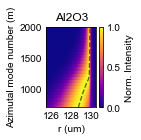

In [11]:
r2 = df2['r (um)']
ν2 = 1e-12*df2_freq['freq'] # in THz
l2 = df2_freq['l']
matrix2 = df2.iloc[:,1:].values

plt.figure(figsize=cm2inch(5.2,5))

# c = plt.pcolormesh(r2, ν2, np.transpose(matrix2), cmap='plasma', vmin=matrix2.min(), vmax=matrix2.max(), rasterized=True)
c = plt.pcolormesh(r2, l2, np.transpose(matrix2), cmap='plasma', vmin=matrix2.min(), vmax=matrix2.max(), rasterized=True, shading='auto')
plt.colorbar(c, label='Norm. Intensity')

plt.plot(r2_peaks, l2, 'k--', lw=1.3, alpha=0.6)

plt.xlim(125.5, 130.5)
plt.xticks([126, 128, 130])
plt.xlabel('r (um)')
# plt.ylabel('Frequency (THz)')
plt.ylabel('Azimutal mode number (m)')
plt.title('Al2O3')
# plt.grid(True, ls='--', lw=1, alpha=0.5, zorder=1, which ='both')
plt.tight_layout()

# plt.savefig(fname2.split(sep='/')[-1].split(sep='.')[0]+'_ColorMap_Simple.svg', dpi=192)

plt.show()

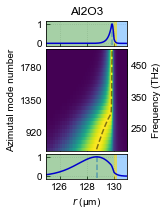

In [33]:
f, (a0, a1, a2) = plt.subplots(3, 1, figsize=cm2inch(3.7,7.4), sharex=True, gridspec_kw={'height_ratios': [1, 4, 1]})
plt.subplots_adjust(hspace=0.05)

xi, xf, t, R = 125, 131, 0.2, 130

a0.set_title('Al2O3')
a0.plot(df2[df2.columns[0]], df2[df2.columns[-1]], c='mediumblue')
a0.vlines(r2_peaks[-1], ymin=-0.1, ymax=1.1, ls='--', alpha=0.5)
a0.axvspan(xi, R, color='#228B22', alpha=0.4, lw=0)
a0.axvspan(R, R+t, color='y', alpha=0.6, lw=0)
a0.axvspan(R+t, xf, color='#1E90FF', alpha=0.4, lw=0)

a1.pcolormesh(r2, l2, np.transpose(matrix2), cmap='viridis', vmin=matrix2.min(), vmax=matrix2.max(), rasterized=True, shading='auto')
a1.plot(r2_peaks, l2, 'k--',  alpha=0.5)

mid = round((l2.iloc[0]+l2.iloc[-1])/2, 0)
inf = round(mid-2*(l2.iloc[-1]-mid)/3, -1)
sup = round(mid+2*(l2.iloc[-1]-mid)/3, -1)

a1.set_yticks([mid, inf, sup])
a1.set_ylabel('Azimutal mode number')

z = np.polyfit(l2, ν2, 1)
a1v = a1.secondary_yaxis('right', functions=(l2ν, ν2l))
a1v.set_ticks([250, 350, 450])
a1v.set_ylabel('Frequency (THz)')

a2.plot(df2[df2.columns[0]], df2[df2.columns[1]], c='mediumblue')
a2.vlines(r2_peaks[0], ymin=-0.1, ymax=1.1, ls='--', alpha=0.6)
a2.axvspan(xi, R, color='#228B22', alpha=0.4, lw=0)
a2.axvspan(R, R+t, color='y', alpha=0.6, lw=0)
a2.axvspan(R+t, xf, color='#1E90FF', alpha=0.4, lw=0)

# fig.colorbar(c,  ax=a2, label='Norm. Intensity', orientation='horizontal')

plt.xlabel(r'$r$ (μm)')
plt.xlim(125, 131)
plt.xticks([126, 128, 130])
# plt.tight_layout()

plt.savefig('Figures/'+fname2.split(sep='/')[-1].split(sep='.')[0]+'_ColorMap.svg', dpi=192)

plt.show()